In [236]:
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df = df.drop("id", axis = 1)

In [5]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
df = df.drop(df.columns[31], axis = 1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
df.rename(columns = {"diagnosis": "target"}, inplace = True)
df["target"] = [1 if i.strip() == 'M' else 0 for i in df["target"]]

In [8]:
labels = df["target"]
labels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [9]:
df = df.drop("target", axis = 1)

In [10]:
df
print(df.shape)

(569, 30)


In [11]:
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df)

**THE CODE IS REFEERENCED FROM THESE SOURCES**

In [ ]:
# https://www.youtube.com/watch?v=kFwe2ZZU7yw
# https://www.youtube.com/watch?v=NxEHSAfFlK8
# https://www.youtube.com/watch?v=sgQAhG5Q7iY
# https://www.youtube.com/watch?v=Oq1cKjR8hNo
# https://www.youtube.com/watch?v=WvmPnGmCaIM
# https://www.mtu.edu/cs/graduate/dissertations/pdfs/using-text-mining-and-machine-learning-classifiers-to-analyze.pdf


In [237]:
from collections import Counter
#creating 2 classes Decision Tree and Node

##creating decision tree class
class DecisionTree:
    def __init__(self, split_forA_node=2, max_depth=100, subset_features=None):
        self.split_forA_node=split_forA_node ##defining some stopping criteria like minimum splittinf for a node and max_depth
        self.max_depth=max_depth
        self.subset_features=subset_features ##to add some randomness in our tree #useful when we build random forest on top of decision trees
        self.root=None 

    def Calculate_Entropy(self, y):
      ##entropy= -sum(probab*log(probab))
        count_val = np.bincount(y) ##bincount is a trick - similar to a histogram
        ##lets calculate the probability
        probability = count_val / len(y) ##len(y) gives the number of values in y.
        for i in probability:
          if i>0:
            entropy= np.sum([i * np.log(i)])
        return -entropy
    def IG_info_gain(self, y, X_column, threshold):
      ##calc. Information gain.. 
      ## IG= Entropy of parent - (weighted average*Entropy of children)
      ##lets do it step by step
        # parent entropy
        entropy_for_parent = self.Calculate_Entropy(y)

        # create children
        L_idx, R_idx = self.HelpMe_split(X_column, threshold)
        ###checking the Left adn the right index
        ##as we know that leaf nodes have 0 entropy or uncertaininty 
        if (len(L_idx) == 0 or len(R_idx) == 0 ):
            return 0 ##so here we need to return 0.
        
        # calculate the weighted avg. entropy of children
        samplesL, samplesR = len(L_idx), len(R_idx)
        Left_Entropy, Right_Entropy = self.Calculate_Entropy(y[L_idx]), self.Calculate_Entropy(y[R_idx])
        entropy_for_child = (samplesL/len(y)) * Left_Entropy + (samplesR/len(y)) * Right_Entropy

        ##lets calculate the information gain
        ## IG= Entropy of parent - (weighted average*Entropy of children)
        IG = entropy_for_parent - entropy_for_child
        print("The information gain is"+str(IG))
        return IG
        
    def fit_model(self, X, y): ## pass in the xTrain and yTrain for the model to fit.

    ##here we check that the subset_features should not exceed the number of actual features.
        if not self.subset_features:
         self.subset_features = X.shape[1]
        else:
         self.subset_features = min(X.shape[1], self.subset_features) ##taking minimum out of both. 

        self.root = self.lets_grow_OUR_tree(X, y) ##this will return the root of the tree at the end

    def HelpMe_split(self, X_column, split_threshold):
        Left_index = np.argwhere(X_column <= split_threshold).flatten() 
        ##we will flatten this so that it is just an array.
        Right_index = np.argwhere(X_column > split_threshold).flatten()
        ##send in the indexes to the node. 
        return Left_index, Right_index

    def Lets_do_voting(self, y):
      ##creating an instance for Counter
        count = Counter(y)
        Count_value = count.most_common(1)[0][0] 
        ##finding the most common among the array of votes
        return Count_value
    
    def _traverse_tree(self, x, node):
        if node.check_A_node():
            return node.value

        if x[node.feature_chosen] <= node.threshold_value:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def lets_grow_OUR_tree(self, X, y, depth=0):
        number_Of_samples, n_feats = X.shape
        ##n_labels is used to determine stopping criteria.
        LabelNum = len(np.unique(y)) ##calcuating the number of unique labels in yTrain.

        # we will check the stopping criteria 
        ## if the label_number =1 or 0. Its a leaf node, no need to split it further.
        ##if the number of samples is 1,2 and it is less than the minimum splits .
        if (number_Of_samples<self.split_forA_node or LabelNum==1 or depth>=self.max_depth):
            value_for_leaf = self.Lets_do_voting(y)
            return create_node(value=value_for_leaf)
        ##we need to set replace 'false',  so that we have all unique values only.
        Index_of_feature = np.random.choice(n_feats, self.subset_features, replace=False)

        # 2. Find the best split based on information gain and entropy
        best_feature, best_thresh = self.Optimal_Split_(X, y, Index_of_feature)

        # creating the child nodes
        Lindex, Rindex = self.HelpMe_split(X[:, best_feature], best_thresh)
        ##Here we will increase the height or depth of trees by 1 and then go to either left or right.
        left = self.lets_grow_OUR_tree(X[Lindex, :], y[Lindex], depth+1)
        right = self.lets_grow_OUR_tree(X[Rindex, :], y[Rindex], depth+1)
        ##return the node created.
        return create_node(best_feature, best_thresh, left, right)
    

    def Optimal_Split_(self, X, y, feat_idxs):
        best_gain = -13 
        Index_split, Threshold_index = None, None
        ##lets traverse all features 
        for idx1 in feat_idxs:
            traverse = X[:, idx1]
            thresholds = np.unique(traverse)

            for thresh in thresholds:
                # here for every feature we will calculate the information gain 
                gain = self.IG_info_gain(y, traverse, thresh)
                if gain > best_gain:
                    best_gain = gain
                    Index_split = idx1
                    Threshold_index = thresh
        return Index_split, Threshold_index

    def Lets_predict(self, X):
        predictions = np.array([self._traverse_tree(x, self.root) for x in X])
        return predictions

## creating node class
#Node class should have the value ,left pointer, right pointer, feature that the node is splitting on and a threshold value)
class create_node:
    def __init__(self, feature_chosen=None, threshold_value=None, left=None, right=None,*,value=None): ##default values
        self.threshold_value = threshold_value
        self.feature_chosen = feature_chosen
        self.value = value
        self.left = left
        self.right = right
        
        
    def check_A_node(self): ##to check if a node is a leaf node.
        return self.value is not None

In [238]:
##make a global variable to store the independent trees prediction
Lets_see=[]
##lets implement the random forest that consists of n number of trees.
class RandomForest:
  ## inititlaizing with some examples
    def __init__(self, number_Of_trees=10, maximum_depth=10, min_split=2, number_Of_feature=None):
        self.number_Of_trees = number_Of_trees
        self.maximum_depth=maximum_depth
        self.min_split=min_split
        self.number_Of_feature=number_Of_feature
        self.trees = [] ##declaring an empty array
        ##here we will keep all our trees.

##lets make all the helper functions.

    def Lets_predict(self, X):
        predictions = np.array([tree.Lets_predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        ##appending the vote of each tree in array.
        Lets_see.append(tree_preds)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        print("The Predictions by the trees in random forest is "+str(predictions))
        return predictions

## lets make the bootstrap
    def bootstrap_sampling(self, X, y):
        number_Of_samples = X.shape[0]
        
##this will introduce randommness in the data that is why it is called random forest
        index = np.random.choice(number_Of_samples, number_Of_samples, replace=True)
        #above replace is set to true, so if one point is picked, it can again be picked (with replacement)
        ##returning datasets using the indexes.
        return X[index], y[index]

##lets make the fit function.
    def fit_model(self, X, y):
      ##empty list
        self.trees = []
        ##creating decision trees according to the parametr that will be specified by the user
        for _ in range(self.number_Of_trees):
            ##Lets create a decision tree
            tree = DecisionTree(max_depth=self.maximum_depth,
                            split_forA_node=self.min_split,
                            subset_features=self.number_Of_feature)
            ##passed all the params above
            ##lets do sampling that is bootstrapped
            X_sample, y_sample = self.bootstrap_sampling(X, y)
            ##fit according to the sample
            tree.fit_model(X_sample, y_sample) ##here we will select our 12 datapoints at random. __TO INRODUCE RANDOMness.
            ##appending
            self.trees.append(tree)


    def _most_common_label(self, y):
        counter = Counter(y)
        ##lets get the count of the most common label 
        most_common = counter.most_common(1)[0][0]
        return most_common


In [239]:
#   df_scaled, labels, test_size=0.2, random_state=1234
y_ = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y_, test_size=0.2)

In [240]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(number_Of_trees=20)
clf.fit_model(X_train, y_train)
y_pred_rf = clf.Lets_predict(X_test)

acc =  accuracy(y_test, y_pred_rf)
print(acc)

Streaming output truncated to the last 5000 lines.
The information gain is4.352973113485453e-05
The information gain is3.774373847617585e-05
The information gain is3.502989520227234e-05
The information gain is0.00018527951931164924
The information gain is0.00017905108380831744
The information gain is0.00016707385996200808
The information gain is0.0001502309883637254
The information gain is0.00014489757139876658
The information gain is0.00013969750667698275
The information gain is0.00013462685471705635
The information gain is0.00012968186922831387
The information gain is0.00012485898787555766
The information gain is0.00012015482371771288
The information gain is0.00011556615727768837
The information gain is0.00010672323348474844
The information gain is9.425345256268078e-05
The information gain is0.00030375260043326996
The information gain is0.0002969945617404754
The information gain is0.0002903686557885997
The information gain is0.00028387104440558836
The information gain is0.00026511176

In [224]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_rf)
cm

array([[62,  2],
       [ 3, 47]])

Accuracy is: 0.956140350877193
F1-score is: 0.9494949494949495
Precision Score is: 0.9591836734693877
ROC_AUC_score is: 0.954375
Recall score is: 0.94
top K score is: 1.0
/nThe Confusion Matrix is shown below: 


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1802: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(


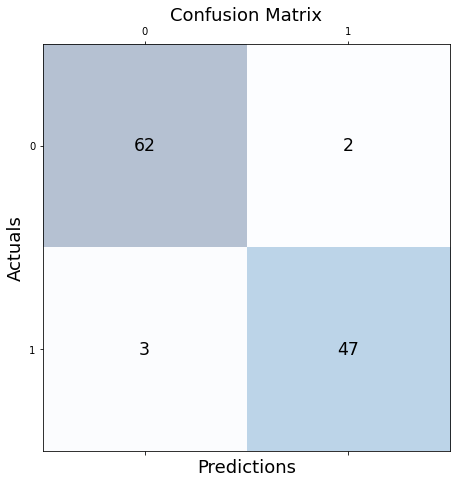

In [226]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, roc_auc_score, recall_score, top_k_accuracy_score, ConfusionMatrixDisplay
print("Accuracy is: "+str(accuracy_score(y_test, y_pred_rf)))
print("F1-score is: "+str(f1_score(y_test, y_pred_rf)))
print("Precision Score is: "+str(precision_score(y_test, y_pred_rf)))
print("ROC_AUC_score is: "+str(roc_auc_score(y_test, y_pred_rf)))
print("Recall score is: "+str(recall_score(y_test, y_pred_rf))) ##Here, the best value is 1 and worst is 0.
print("top K score is: "+str(top_k_accuracy_score(y_test, y_pred_rf)))
print("/nThe Confusion Matrix is shown below: ")
confuse=confusion_matrix(y_test, y_pred_rf)

##plotting the confusion matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confuse, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confuse.shape[0]):
    for j in range(confuse.shape[1]):
        ax.text(x=j, y=i,s=confuse[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

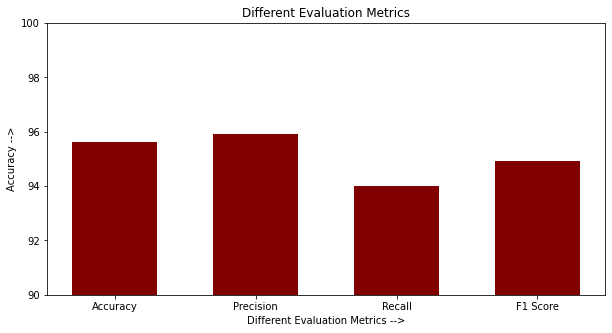

In [234]:
data = {'Accuracy': 95.61, 'Precision':95.91, 'Recall':94, 'F1 Score':94.94}

Evaluation = list(data.keys())
Scores = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
plt.ylim(90,100)
# creating the bar plot
plt.bar(Evaluation, Scores, color ='maroon',
        width = 0.6)
 
plt.xlabel("Different Evaluation Metrics -->")
plt.ylabel("Accuracy -->")
plt.title("Different Evaluation Metrics")
plt.show()

**HyperParameter Tuning**

In [168]:
##Lets change the number of trees and see the accuracy
number_of_trees=[1,3,5,10,15,20,50]
for num in number_of_trees:
  testIt=RandomForest(number_Of_trees=15)
  testIt.fit_model(X_train, y_train)
  y_pred_hyp=testIt.Lets_predict(X_test)
  accHyp=accuracy(y_test,y_pred_hyp)
  print("The accuracy when the number of trees is "+str(num)+" is equal to "+str(accHyp))

The Predictions by the trees in random forest is [0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0
 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0
 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 1 0 1]
The accuracy when the number of trees is 1 is equal to 0.9210526315789473
The Predictions by the trees in random forest is [0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0
 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0
 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0
 1 0 1]
The accuracy when the number of trees is 3 is equal to 0.9210526315789473
The Predictions by the trees in random forest is [0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0
 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0
 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0
 1 0 1]
The ac

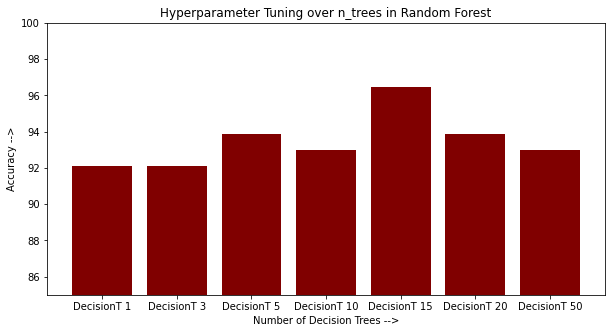

In [235]:
data = {'DecisionT 1': 92.10, 'DecisionT 3':92.10, 'DecisionT 5':93.85, 'DecisionT 10':92.98,'DecisionT 15':96.49, 'DecisionT 20':93.85, 'DecisionT 50':92.98}

Decision_T_num = list(data.keys())
Accuracy = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
plt.ylim(85,100)
# creating the bar plot
plt.bar(Decision_T_num, Accuracy, color ='maroon',
        width = 0.8)
 
plt.xlabel("Number of Decision Trees -->")
plt.ylabel("Accuracy -->")
plt.title("Hyperparameter Tuning over n_trees in Random Forest")
plt.show()

In [171]:
##miss rate is the ratio of FN/FN+TP
miss_rate=cm[1][0] / (cm[0][0] + cm[1][0])
print("miss Rate is: "+ str(miss_rate))

miss Rate is: 0.014492753623188406


**IMPLEMENTATION CORRECTNESS**

In [172]:
df2=pd.read_csv('/content/drive/MyDrive/implementation_correctness_dataset.csv')
df2

,Feature 1,Feature 2,Class/Cluster
0,0.020,0.000000,1
1,1.045,0.000000,1
2,2.080,0.000000,1
3,3.125,0.000000,1
4,4.180,0.000000,1
5,5.245,0.000000,1
6,6.320,0.000000,1
7,7.405,0.000000,1
8,8.500,0.000000,1
9,9.605,0.000000,1


In [173]:
print(df2.columns)

Index(['Feature 1', 'Feature 2', 'Class/Cluster'], dtype='object')


In [174]:
# xx=df2.drop("Feature 2")
yy=df2['Class/Cluster']
xx=df2.drop(columns=['Class/Cluster'])
_x= np.array(xx)
_y = np.array(yy)

In [175]:
scaler = preprocessing.StandardScaler()
df_scaled_imp = scaler.fit_transform(_x)
print(df_scaled_imp)

[[-1.08237119 -0.73690831]
 [-0.74668875 -0.73690831]
 [-0.40773135 -0.73690831]
 [-0.06549901 -0.73690831]
 [ 0.28000828 -0.73690831]
 [ 0.62879052 -0.73690831]
 [ 0.98084772 -0.73690831]
 [ 1.33617986 -0.73690831]
 [ 1.69478696 -0.73690831]
 [ 2.056669   -0.73690831]
 [-1.08892109 -0.0128263 ]
 [-1.08892109  0.73493855]
 [-1.08892109  1.53308996]
 [-1.08892109  2.40984653]
 [-0.1064359   0.43708635]
 [-0.1064359   0.89781949]
 [-0.1064359   1.3691285 ]]


In [230]:
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(df_scaled_imp, _y, test_size=0.25) 
## test_size set to 0.25 as we want to test it on 12 data points 
print(y_train_imp.shape)
print("The random 12 data points on which to train out of 17 are "+str(y_train_imp))

(12,)
The random 12 data points on which to train out of 17 are [1 2 1 1 1 1 1 1 1 2 1 2]


In [177]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(number_Of_trees=20)
clf.fit_model(X_train_imp, y_train_imp)
y_pred_rf = clf.Lets_predict(X_test_imp)

acc =  accuracy(y_test_imp, y_pred_rf)
print(acc)

The Predictions by the trees in random forest is [1 1 1 1 1]
1.0


**Lets see for [4,4] data point**

In [178]:
test_datapoint=[4,4]
predictions_4=clf.Lets_predict([test_datapoint])
print(Lets_see[-1])
print("Final Classification : Prediction for [[4,4]] point: "+" It belongs to "+ str(predictions_4)+" class")

The Predictions by the trees in random forest is [2]
[[2 2 2 2 1 2 2 2 2 1 2 1 1 2 2 2 1 2 2 1]]
Final Classification : Prediction for [[4,4]] point:  It belongs to [2] class


In [179]:
preds_=Lets_see[-1]
preds_
preds_imp=preds_.flatten()
preds_imp

# ## Counting the number of trees that predict class 1 and class 2, respectively
num_class1 = 0
num_class2 = 0
for trees in preds_imp:
  if(trees==1): 
    num_class1+=1
  else:
    num_class2+=1

print("Here we take the majority vote for the final classification ")
print("The number of base trees that classify [4,4] as class 1 are " +str(num_class1))
print("The number of base trees that classify [4,4] as class 2 are " +str(num_class2))

Here we take the majority vote for the final classification 
The number of base trees that classify [4,4] as class 1 are 6
The number of base trees that classify [4,4] as class 2 are 14
